<a href="https://colab.research.google.com/github/dharsan19/car_damage_detection/blob/main/Rithu_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# install dependencies
!pip install -U torch torchvision cython
!pip install -U 'git+https://github.com/facebookresearch/fvcore.git' 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
torch.__version__

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/fvcore.git to /tmp/pip-req-build-yorlc7jg
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/fvcore.git /tmp/pip-req-build-yorlc7jg
  Resolved https://github.com/facebookresearch/fvcore.git to commit 51092b5515cbb493f73de079743dd6b11cc4bbf1
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-tyqij4pz
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-tyqij4pz
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.4 MB/s eta 0:00:0

'2.0.0+cu118'

In [4]:
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo

Cloning into 'detectron2_repo'...
remote: Enumerating objects: 14989, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 14989 (delta 1), reused 4 (delta 1), pack-reused 14975
Receiving objects: 100% (14989/14989), 6.08 MiB | 8.72 MiB/s, done.
Resolving deltas: 100% (10864/10864), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/detectron2_repo
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.

In [1]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

In [2]:
!git clone https://github.com/priya-dwivedi/Deep-Learning

Cloning into 'Deep-Learning'...
remote: Enumerating objects: 3461, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 3461 (delta 3), reused 0 (delta 0), pack-reused 3453
Receiving objects: 100% (3461/3461), 424.80 MiB | 22.82 MiB/s, done.
Resolving deltas: 100% (945/945), done.
Updating files: 100% (3469/3469), done.


In [3]:

import os
import numpy as np
import json
from detectron2.structures import BoxMode
import itertools

# write a function that loads the dataset into detectron2's standard format
def get_balloon_dicts(img_dir):
    json_file = os.path.join(img_dir, "via_region_data.json")
    with open(json_file) as f:
        imgs_anns = json.load(f)

    dataset_dicts = []
    for idx, v in enumerate(list(imgs_anns.values())[3:]):
        record = {}
        
          
        filename = os.path.join(img_dir, v["filename"])
        height, width = cv2.imread(filename).shape[:2]
        record["file_name"] = filename
        record["image_id"] = idx
        record["height"] = height
        record["width"] = width

        annos = v["regions"]
        objs = []
        for _, anno in annos.items():
            #assert not anno["region_attributes"]
            anno = anno["shape_attributes"]
            px = anno["all_points_x"]
            py = anno["all_points_y"]
            poly = [(x + 0.5, y + 0.5) for x, y in zip(px, py)]
            poly = list(itertools.chain.from_iterable(poly))

            obj = {
                "bbox": [np.min(px), np.min(py), np.max(px), np.max(py)],
                "bbox_mode": BoxMode.XYXY_ABS,
                "segmentation": [poly],
                "category_id": 0,
                "iscrowd": 0
            }
            objs.append(obj)
        record["annotations"] = objs
        dataset_dicts.append(record)
        
    return dataset_dicts

from detectron2.data import DatasetCatalog, MetadataCatalog
path = "/content/Deep-Learning/mask_rcnn_damage_detection/customImages"
for d in ["train", "val"]:
    DatasetCatalog.register(path +"/" + d, lambda d=d: get_balloon_dicts(path+"/"  + d))
    MetadataCatalog.get(path+"/" + d).set(thing_classes=["damage"])
balloon_metadata = MetadataCatalog.get("car_damage")

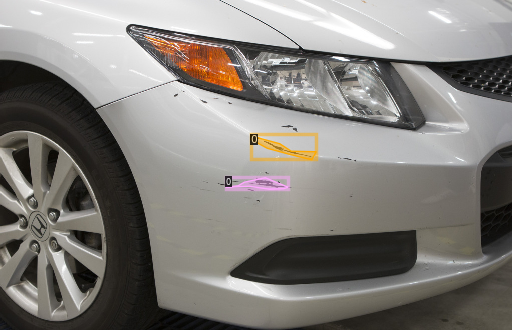

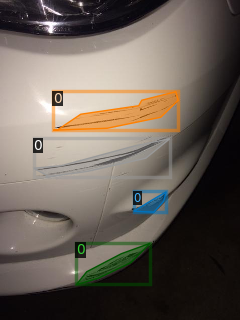

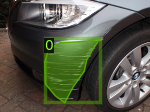

In [4]:

dataset_dicts = get_balloon_dicts(path + "/train")
for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=balloon_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [5]:
!nvidia-smi

Mon Apr 17 18:25:51 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg

cfg = get_cfg()
cfg.merge_from_file("./detectron2_repo/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.DATASETS.TRAIN = (path + "/train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"  # initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 1000    # 300 iterations seems good enough, but you can certainly train longer
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # only has one class (ballon)

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[04/17 18:25:56 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f10217.pkl: 178MB [00:01, 138MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[04/17 18:25:58 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[04/17 18:26:11 d2.utils.events]:  eta: 0:07:21  iter: 19  total_loss: 1.961  loss_cls: 0.7154  loss_box_reg: 0.4165  loss_mask: 0.6909  loss_rpn_cls: 0.03065  loss_rpn_loc: 0.01734    time: 0.4409  last_time: 0.4550  data_time: 0.0190  last_data_time: 0.0200   lr: 4.9953e-06  max_mem: 2579M
[04/17 18:26:23 d2.utils.events]:  eta: 0:06:55  iter: 39  total_loss: 1.847  loss_cls: 0.6389  loss_box_reg: 0.3285  loss_mask: 0.6875  loss_rpn_cls: 0.08119  loss_rpn_loc: 0.02124    time: 0.4531  last_time: 0.3790  data_time: 0.0150  last_data_time: 0.0063   lr: 9.9902e-06  max_mem: 2579M
[04/17 18:26:31 d2.utils.events]:  eta: 0:06:44  iter: 59  total_loss: 1.667  loss_cls: 0.5275  loss_box_reg: 0.3861  loss_mask: 0.6808  loss_rpn_cls: 0.03044  loss_rpn_loc: 0.01549    time: 0.4420  last_time: 0.3912  data_time: 0.0108  last_data_time: 0.0054   lr: 1.4985e-05  max_mem: 2579M
[04/17 18:26:40 d2.utils.events]:  eta: 0:06:40  iter: 79  total_loss: 1.631  loss_cls: 0.4617  loss_box_reg: 0.4304  los

In [8]:
# Look at training curves in tensorboard:
%load_ext tensorboard
%tensorboard --logdir output

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 5452), started 0:00:11 ago. (Use '!kill 5452' to kill it.)

<IPython.core.display.Javascript object>

In [9]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.85  # set the testing threshold for this model
cfg.DATASETS.TEST = (path + "/val", )
predictor = DefaultPredictor(cfg)

[04/17 18:35:13 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


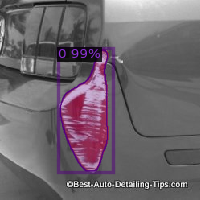

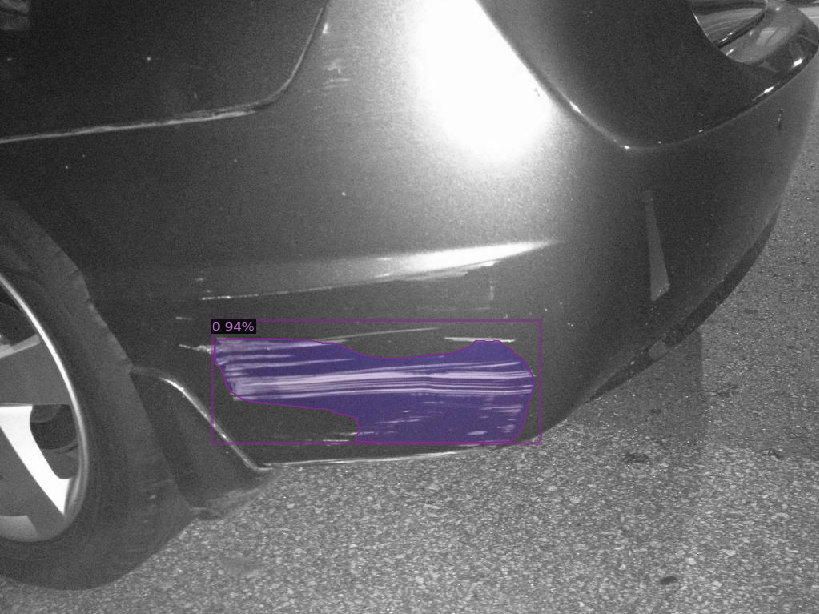

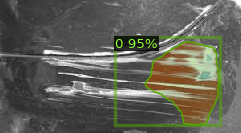

In [10]:
from detectron2.utils.visualizer import ColorMode
dataset_dicts = get_balloon_dicts(path + "/val")
for d in random.sample(dataset_dicts, 3):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=balloon_metadata, 
                   scale=0.8, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[:, :, ::-1])

In [11]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator(path+ "/val", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, path + "/val")
inference_on_dataset(trainer.model, val_loader, evaluator)
# another equivalent way is to use trainer.test

WARNING [04/17 18:35:43 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[04/17 18:35:43 d2.evaluation.coco_evaluation]: Trying to convert '/content/Deep-Learning/mask_rcnn_damage_detection/customImages/val' to COCO format ...
[04/17 18:35:43 d2.data.datasets.coco]: Converting annotations of dataset '/content/Deep-Learning/mask_rcnn_damage_detection/customImages/val' to COCO format ...)
[04/17 18:35:43 d2.data.datasets.coco]: Converting dataset dicts into COCO format
[04/17 18:35:43 d2.data.datasets.coco]: Conversion finished, #images: 12, #annotations: 14
[04/17 18:35:43 d2.data.datasets.coco]: Caching COCO format annotations at '/content/Deep-Learning/mask_rcnn_damage_detection/customImages/val_coco_format.json' ...
[04/17 18:35:43 d2.data.build]: Distribution of instances among all 1 categories:
|  category  | #instances   |
|:----------:|:-------------|
|   damage   | 14           |
|  

OrderedDict([('bbox',
              {'AP': 42.29546638874414,
               'AP50': 81.3246841925572,
               'AP75': 44.22442244224422,
               'APs': 0.0,
               'APm': 57.951256664127946,
               'APl': 35.90573700227166}),
             ('segm',
              {'AP': 29.254211561739723,
               'AP50': 87.45874587458748,
               'AP75': 13.411341134113414,
               'APs': 0.0,
               'APm': 34.12101210121013,
               'APl': 31.97162985529322})])